In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [75]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

In [76]:
churn = pd.read_csv("Churn_Modelling.csv")

In [77]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
churn.isnull().sum().to_frame().rename(columns={0:"Toplam Eksik Değer Sayısı"})

,Toplam Eksik Değer Sayısı
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [79]:
churn.drop(["RowNumber",'CustomerId'],axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [80]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [81]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

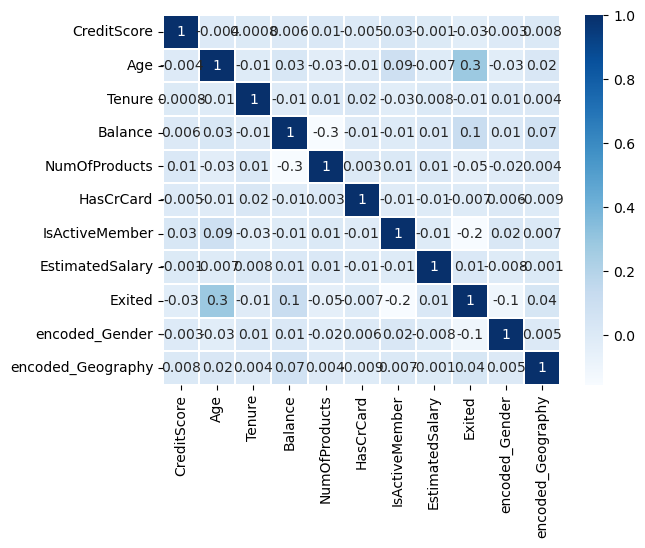

In [82]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

le = LabelEncoder()
churn['encoded_Gender'] = le.fit_transform(churn['Gender'])
churn['encoded_Geography'] = le.fit_transform(churn['Geography'])
sns.heatmap(churn.drop(['Gender','Geography'], axis=1).corr(),robust=True, fmt='.1g', linewidths=1.42,annot=True, cmap='Blues')

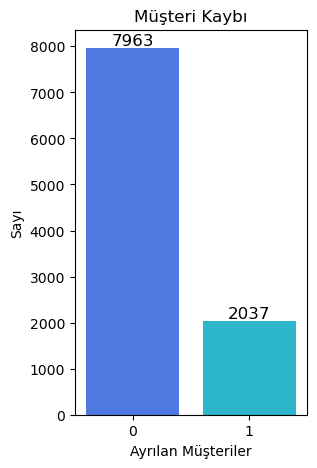

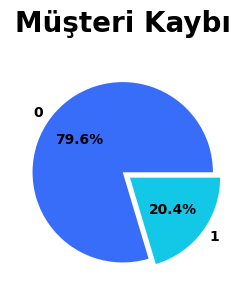

In [83]:
count = churn["Exited"].value_counts()
plt.figure(figsize=(3, 5))
ax = sns.countplot(x="Exited", data=churn)
plt.title("Müşteri Kaybı")
plt.xlabel("Ayrılan Müşteriler")
plt.ylabel("Sayı")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f"{p.get_height():.0f}", ha="center", va="bottom", size=12)
plt.show()

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("rainbow"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Müşteri Kaybı",fontweight="black",size=20,pad=20)
plt.show()

Geography
France     3543
Germany    1791
Spain      1721
Name: HasCrCard, dtype: int64


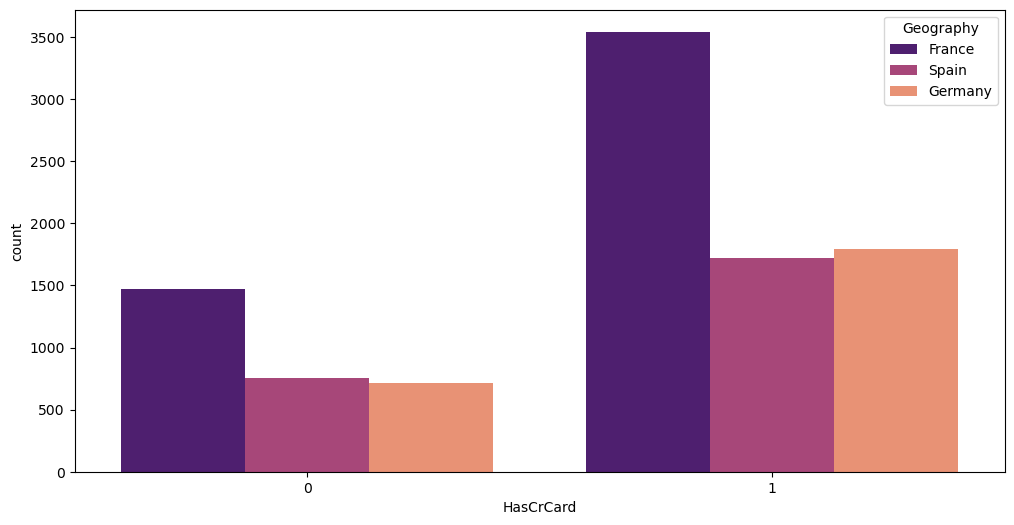

In [84]:
plt.figure(figsize = (12,6)) 
sns.countplot(x="HasCrCard",hue = "Geography", data=churn, palette="magma");
print(churn.groupby('Geography')["HasCrCard"].sum())

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


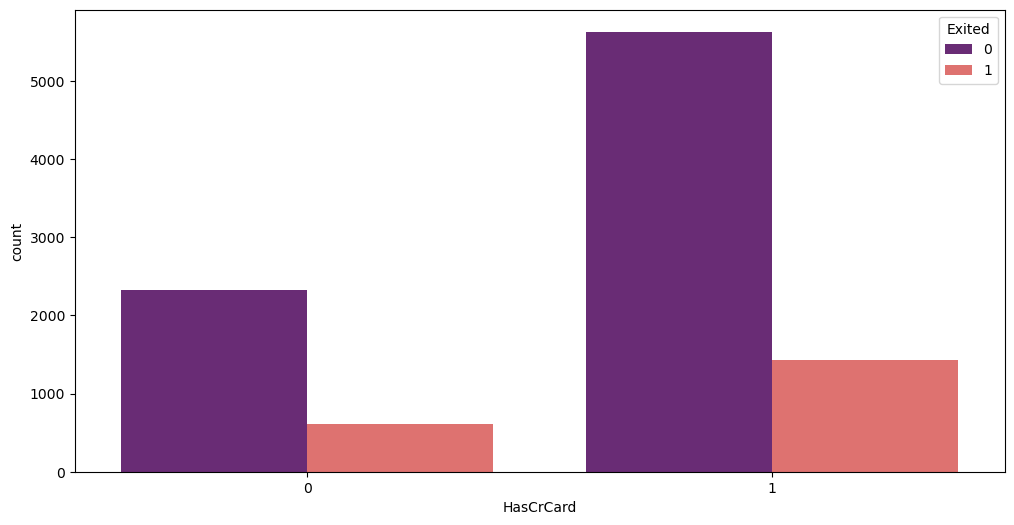

In [85]:
plt.figure(figsize = (12,6)) 
sns.countplot(x="HasCrCard",hue = "Exited", data=churn, palette="magma");
print(churn.groupby('Geography')["Exited"].sum())

In [86]:
churn["Exited"].replace({0:"No",1:"Yes"},inplace=True)

In [87]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=churn, hue="Exited",palette="magma")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(churn[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"{column} göre Müşteri Kaybı",fontweight="black",size=20,pad=20)
    plt.show()

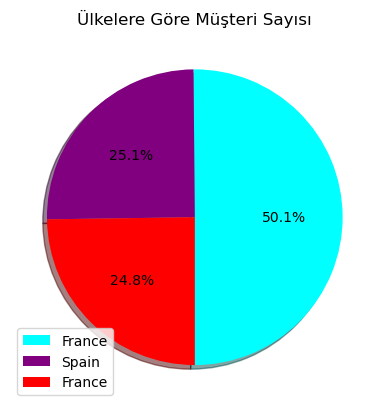

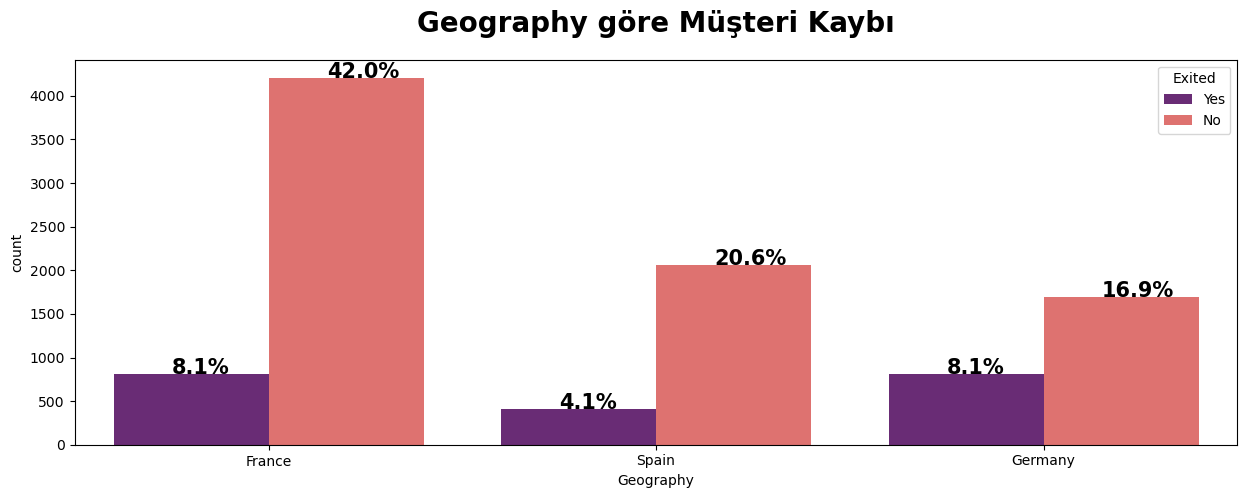

In [88]:
# Data to plot
sizes = churn['Geography'].value_counts(sort = True)
labels=churn['Geography']
colors = ["cyan","purple","red"]

plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Ülkelere Göre Müşteri Sayısı')
plt.legend(labels)
plt.show()

countplot("Geography")

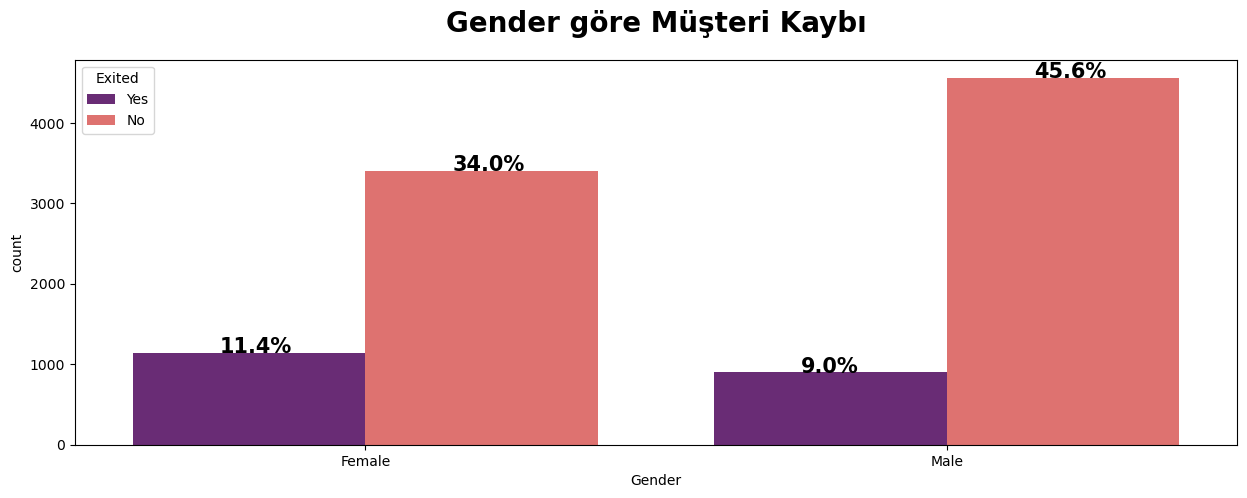

In [89]:
countplot("Gender")

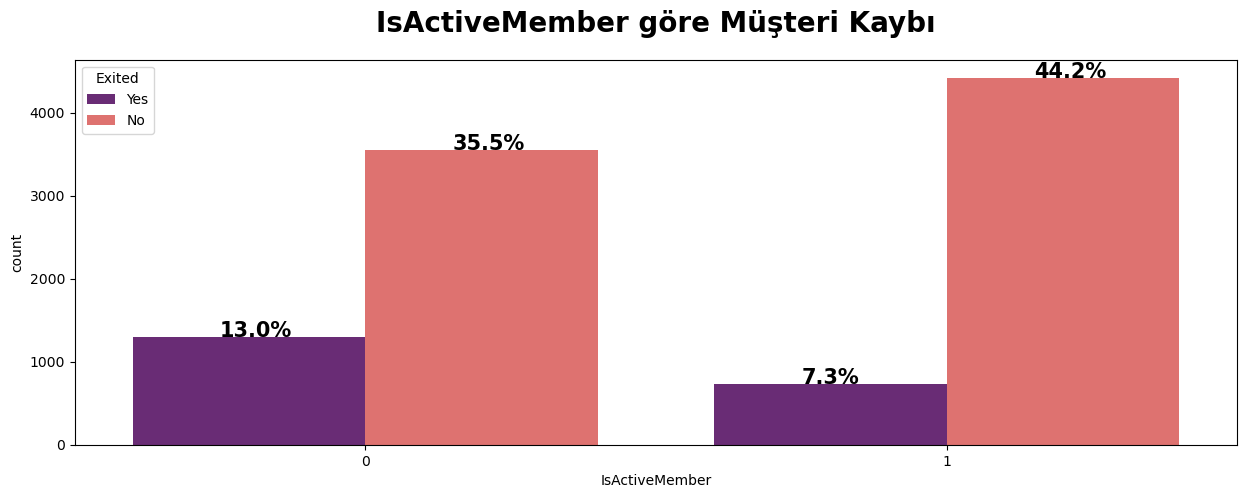

In [90]:
countplot("IsActiveMember")

In [91]:
def continous_plot(column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Exited",data=churn,kde=True,palette="magma")
    plt.title(f"{column} Göre Müşteri Kaybı",fontweight="black",pad=20,size=15)
    
    plt.subplot(1,2,2)
    sns.boxplot(x="Exited", y=column, data=churn, palette="Set2")
    plt.title(f"{column} Göre Müşteri Kaybı",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

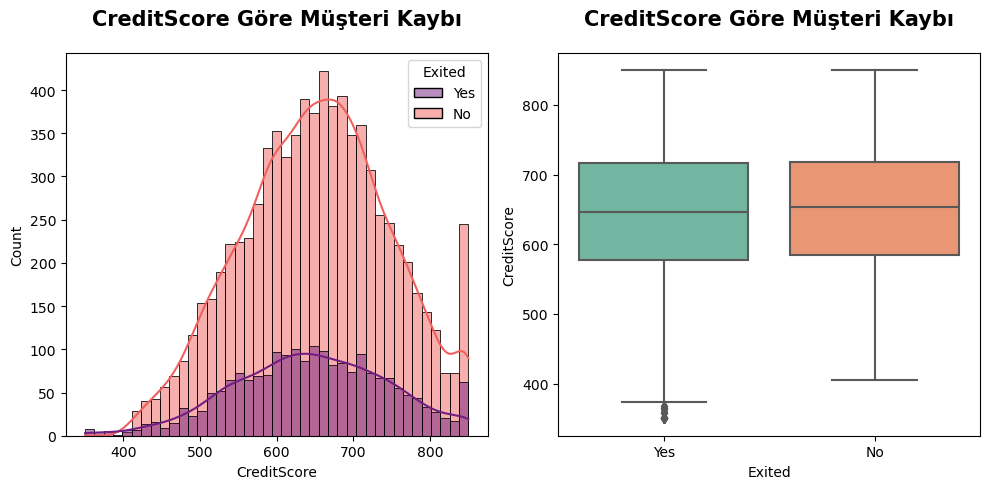

In [92]:
continous_plot("CreditScore")

In [93]:
fig = px.box(churn, x="HasCrCard", y = "Age",color = 'Exited');
fig.update_layout(title_text="Credit Card Usage & Age - With Outliers(Exited-Not Exited groups)")
fig.show();

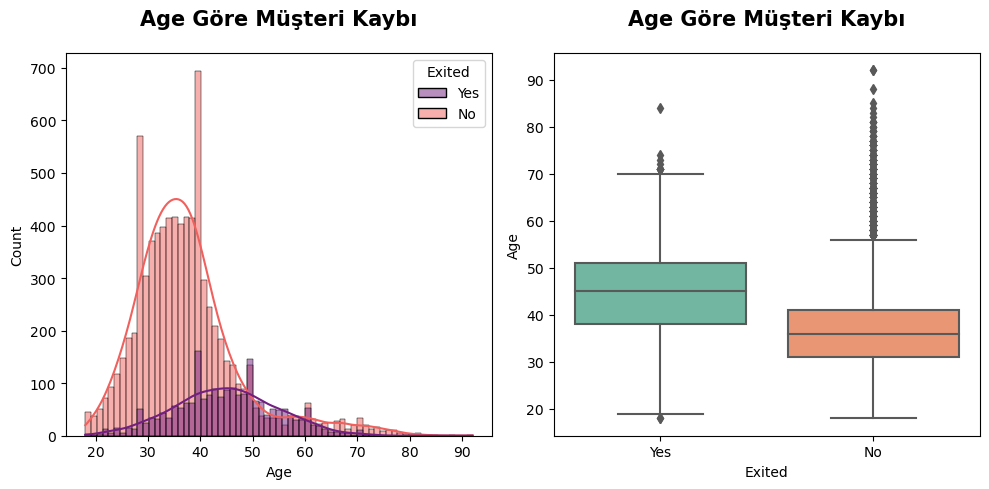

In [94]:
continous_plot("Age")

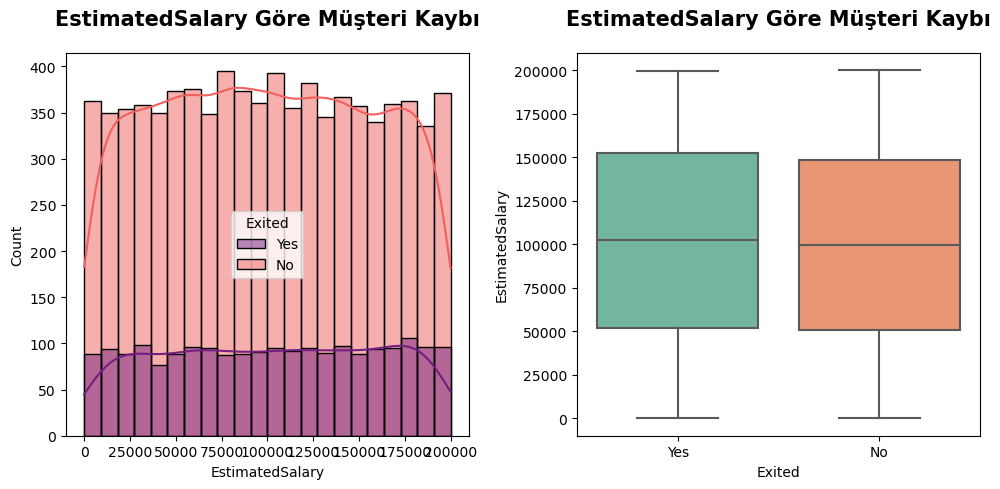

In [95]:
continous_plot("EstimatedSalary")

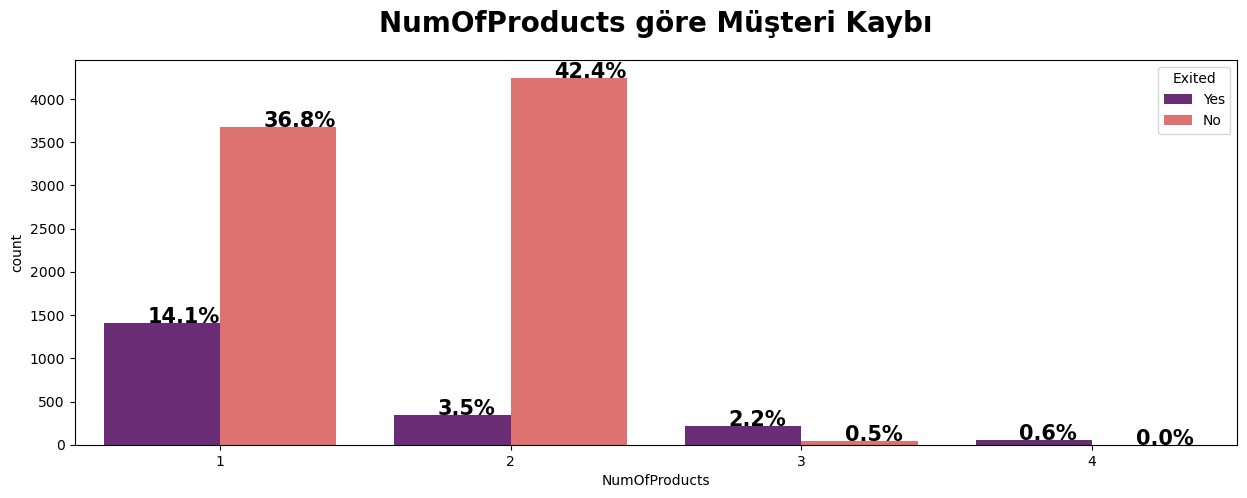

In [96]:
countplot("NumOfProducts")

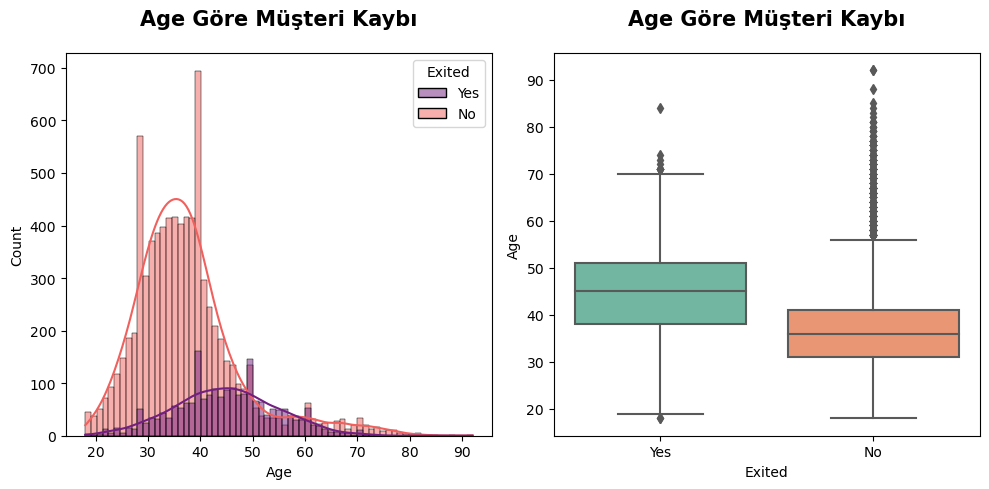

In [97]:
continous_plot("Age")

In [98]:
X = churn.drop(columns=["Exited"])
y = churn["Exited"]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [100]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 12)
Shape of x_test is:  (2000, 12)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [101]:
le = LabelEncoder()
x_train['Geography'] = le.fit_transform(x_train['Geography'])
x_test['Geography'] = le.transform(x_test['Geography'])
x_train['Gender'] = le.fit_transform(x_train['Gender'])
x_test['Gender'] = le.transform(x_test['Gender'])
X = pd.concat([x_train, x_test], ignore_index=True)

oe = OrdinalEncoder()
X[['Age']] = oe.fit_transform(X[['Age']])

x_train = X.loc[:len(y_train)-1]
x_test = X.loc[len(y_train):]

In [102]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [103]:
log_reg = LogisticRegression().fit(x_train_smote, y_train_smote)
y_pred = log_reg.predict(x_test)
log_model = (accuracy_score(y_test, y_pred) * 100)
print(log_model)

73.65


In [104]:
knn =KNeighborsClassifier()
knn_model = knn.fit(x_train_smote,y_train_smote)
knn_model

KNeighborsClassifier()

In [105]:
y_pred = knn_model.predict(x_test)
knn_score = (accuracy_score(y_test,y_pred)*100)
knn_score

58.25

In [106]:
knn_params = {"n_neighbors":np.arange(1,50),
              "weights": ["uniform","distance"],
              "metric":["euclidean","manhattan"]}

In [107]:
knn =KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv = 10)
knn_cv = knn_cv.fit(x_train,y_train)

In [108]:
knn_final =KNeighborsClassifier(n_neighbors =15,metric='manhattan',weights='distance')
knn_final = knn_final.fit(x_train_smote,y_train_smote)
y_pred = knn_final.predict(x_test)
knn_tuned = (accuracy_score(y_test,y_pred)*100)
knn_tuned

57.9

In [109]:
r_for = RandomForestClassifier().fit(x_train_smote,y_train_smote)
r_for

RandomForestClassifier()

In [110]:
y_pred = r_for.predict(x_test)
rf_score = accuracy_score(y_test,y_pred)*100
rf_score

82.1

In [111]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [118]:
y_train_smote_encoded = le.fit_transform(y_train_smote)
xgb = XGBClassifier(n_estimators=100)
xgb_model = xgb.fit(x_train_smote, y_train_smote_encoded)

In [119]:
y_pred = xgb_model.predict(x_test)
xgb_score = accuracy_score(y_test,y_pred)*100
xgb_score

83.25

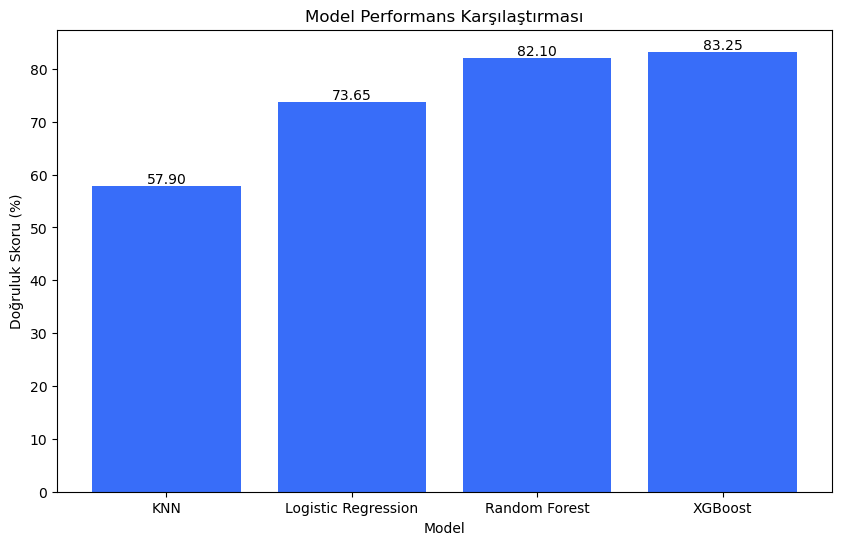

In [120]:
model_scores = {
    'Logistic Regression': log_model,
    'KNN': knn_tuned,
    'Random Forest': rf_score,
    'XGBoost': xgb_score
}

sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])
sorted_models, sorted_scores = zip(*sorted_scores)

plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_scores)
plt.title('Model Performans Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Doğruluk Skoru (%)')

for i, v in enumerate(sorted_scores):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center')
plt.show()

In [121]:
dtree = DecisionTreeClassifier()

In [122]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [123]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [124]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'random_state': 0,
 'splitter': 'best'}

In [125]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=0)

In [127]:
y_train_pred_encoded = le.fit_transform(y_train_pred)
y_test_pred_encoded = le.transform(y_test_pred)

# Doğruluk puanlarını hesapla
train_accuracy = accuracy_score(y_train, y_train_pred_encoded)
test_accuracy = accuracy_score(y_test, y_test_pred_encoded)

print("Modelin Train Verisi Üzerindeki Doğruluk Puanı =>", round(train_accuracy * 100, 2), "%")
print("Modelin Test Verisi Üzerindeki Doğruluk Puanı =>", round(test_accuracy * 100, 2), "%")

Modelin Train Verisi Üzerindeki Doğruluk Puanı => 81.56 %
Modelin Test Verisi Üzerindeki Doğruluk Puanı => 76.95 %


In [129]:
y_test_pred_encoded = le.transform(y_test_pred)

# F1 skoru, recall skoru ve precision skoru hesapla
f1 = f1_score(y_test, y_test_pred_encoded, average="micro")
recall = recall_score(y_test, y_test_pred_encoded, average="micro")
precision = precision_score(y_test, y_test_pred_encoded, average="micro")

print("Modelin F1 Skoru =>", f1)
print("Modelin Recall Skoru =>", recall)
print("Modelin Precision Skoru =>", precision)

Modelin F1 Skoru => 0.7695
Modelin Recall Skoru => 0.7695
Modelin Precision Skoru => 0.7695


In [130]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

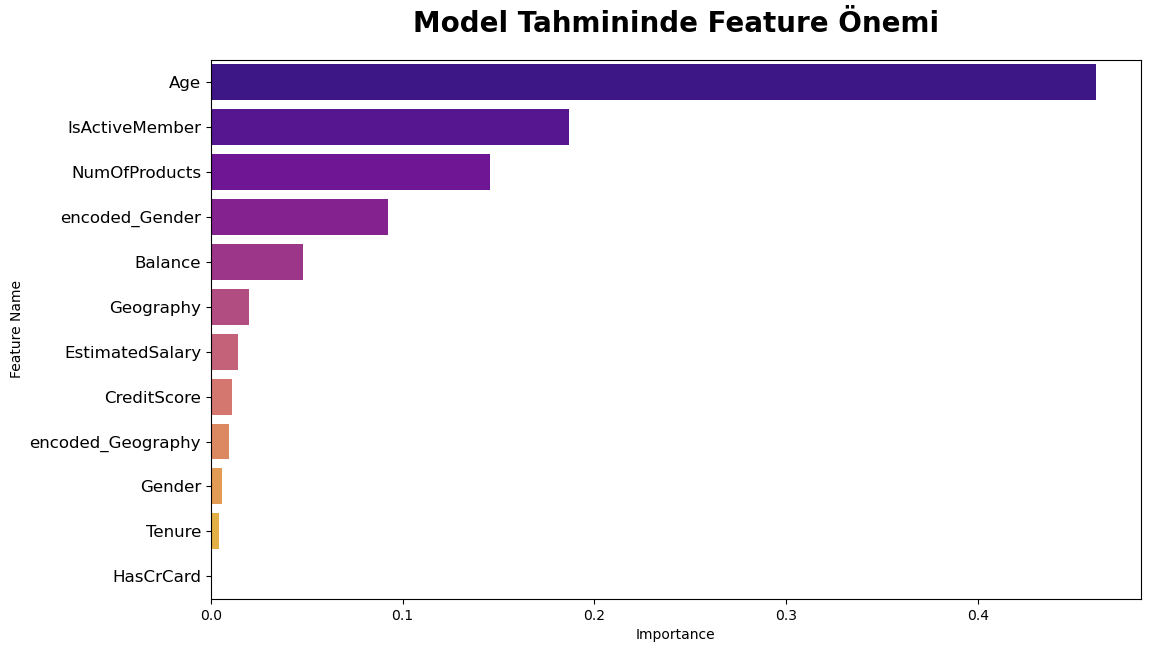

In [131]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Model Tahmininde Feature Önemi", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

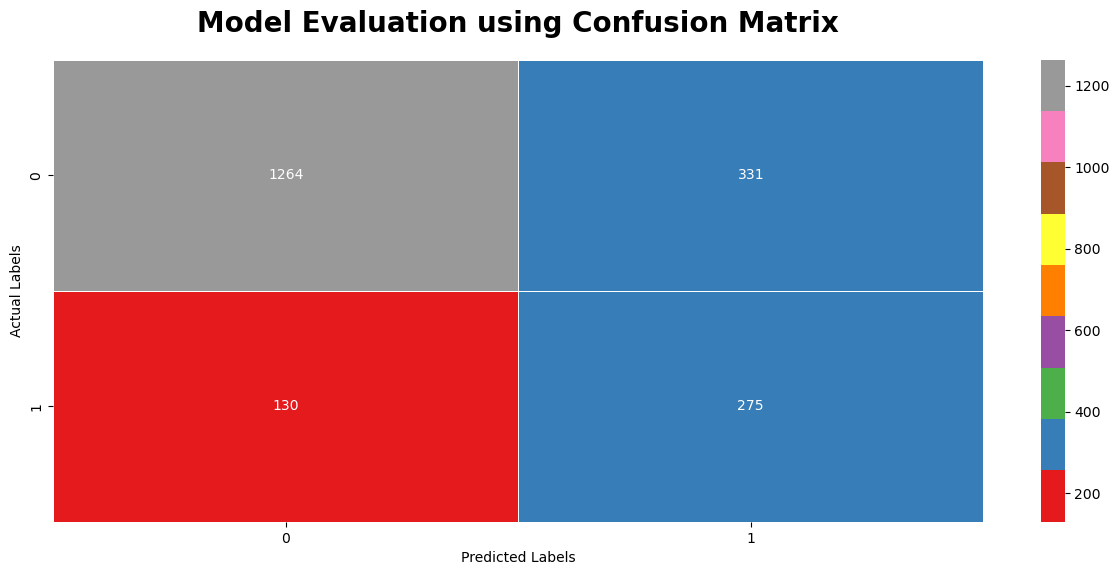

In [133]:
cm = confusion_matrix(y_test,y_test_pred_encoded)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()